In [15]:
# Project: Oncology Line of Therapy (LoT) Analysis – Simulated RWD
# Author: Ruchika Kaur

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("oncology_lot_simulated_data.csv", parse_dates=["Start_Date", "End_Date"])

# Preview the data
df.head()


,Patient_ID,Cancer_Type,Line_of_Therapy,Regimen,Start_Date,End_Date,Duration_Days,Response
0,PAT0000,breast,1,Targeted B,2020-05-20,2020-08-16,88.0,Progressed
1,PAT0001,Ovarian,1,Hormone d,2020-10-29,2021-01-01,64.0,Stable
2,PAT0002,Lung,1,combo E,2020-09-15,2020-11-17,63.0,Progressed
3,PAT0002,Lung,2,combo E,2020-12-17,2021-04-09,113.0,Progressed
4,PAT0003,Ovarian,1,Targeted B,2020-01-04,2020-06-01,149.0,Complete Response


In [16]:
print("Intitial shape:", df.shape)

Intitial shape: (261, 8)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Patient_ID       261 non-null    object        
 1   Cancer_Type      261 non-null    object        
 2   Line_of_Therapy  261 non-null    int64         
 3   Regimen          248 non-null    object        
 4   Start_Date       261 non-null    datetime64[ns]
 5   End_Date         261 non-null    datetime64[ns]
 6   Duration_Days    248 non-null    float64       
 7   Response         235 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 16.4+ KB


In [18]:
df.isnull().sum()

Patient_ID          0
Cancer_Type         0
Line_of_Therapy     0
Regimen            13
Start_Date          0
End_Date            0
Duration_Days      13
Response           26
dtype: int64

CLEANING THE DATASET

In [19]:
# Check and remove duplicate rows
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 5
Duplicates after: 0


In [20]:
#removing white spaces and fixinf text formatting
df['Cancer_Type']= df['Cancer_Type'].str.strip().str.title()
df['Regimen']= df['Regimen'].str.strip().str.title()

df.head()

,Patient_ID,Cancer_Type,Line_of_Therapy,Regimen,Start_Date,End_Date,Duration_Days,Response
0,PAT0000,Breast,1,Targeted B,2020-05-20,2020-08-16,88.0,Progressed
1,PAT0001,Ovarian,1,Hormone D,2020-10-29,2021-01-01,64.0,Stable
2,PAT0002,Lung,1,Combo E,2020-09-15,2020-11-17,63.0,Progressed
3,PAT0002,Lung,2,Combo E,2020-12-17,2021-04-09,113.0,Progressed
4,PAT0003,Ovarian,1,Targeted B,2020-01-04,2020-06-01,149.0,Complete Response


In [21]:
# Check nulls
df.isnull().sum()

# Impute or drop depending on context
df['Response'] = df['Response'].fillna("Unknown")  # or df.dropna(subset=['Response'])
df['Regimen'] = df['Regimen'].fillna("Missing Regimen")
df['Duration_Days'] = df['Duration_Days'].fillna((df['End_Date'] - df['Start_Date']).dt.days)


In [22]:
# Identify invalid treatment records
invalid_dates = df[df['End_Date'] < df['Start_Date']]
print("Records with End_Date earlier than Start_Date:", len(invalid_dates))

# Drop these rows
df = df[df['End_Date'] >= df['Start_Date']].copy()

# Recalculate treatment duration
df['Duration_Days'] = (df['End_Date'] - df['Start_Date']).dt.days



Records with End_Date earlier than Start_Date: 13


Treatment records where End_Date precedes Start_Date were excluded, as correcting these without source confirmation may lead to unethical assumptions about clinical timelines. This aligns with best practices in RWD quality control.

In [23]:
print("Final shape after cleaning:", df.shape)
df.info()
df.describe()


Final shape after cleaning: (243, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 254
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Patient_ID       243 non-null    object        
 1   Cancer_Type      243 non-null    object        
 2   Line_of_Therapy  243 non-null    int64         
 3   Regimen          243 non-null    object        
 4   Start_Date       243 non-null    datetime64[ns]
 5   End_Date         243 non-null    datetime64[ns]
 6   Duration_Days    243 non-null    int64         
 7   Response         243 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 17.1+ KB


,Line_of_Therapy,Start_Date,End_Date,Duration_Days
count,243.000000,243,243,243.000000
mean,2.028807,2020-12-08 18:45:55.555555584,2021-04-08 02:22:13.333333248,120.316872
min,1.000000,2020-01-04 00:00:00,2020-04-04 00:00:00,60.000000
25%,1.000000,2020-07-31 00:00:00,2020-11-17 12:00:00,91.000000
50%,2.000000,2020-11-20 00:00:00,2021-03-20 00:00:00,120.000000
75%,3.000000,2021-04-13 00:00:00,2021-08-07 12:00:00,150.000000
max,4.000000,2022-06-08 00:00:00,2022-09-06 00:00:00,180.000000
std,0.997514,NaN,NaN,34.461537


Exploratory Data Analysis (EDA) & Visualizations

C:\Users\Dell\AppData\Local\Temp\ipykernel_8812\4129827663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Cancer_Type", order=df['Cancer_Type'].value_counts().index, palette="Set2")


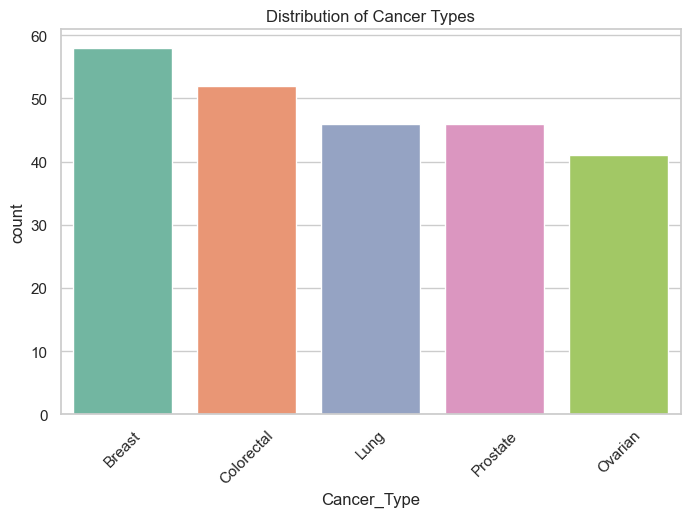

In [24]:
#Distribution of Cancer Types

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Cancer_Type", order=df['Cancer_Type'].value_counts().index, palette="Set2")
plt.title("Distribution of Cancer Types")
plt.xticks(rotation=45)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_8812\3966999342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lot_counts.index, y=lot_counts.values, palette="coolwarm")


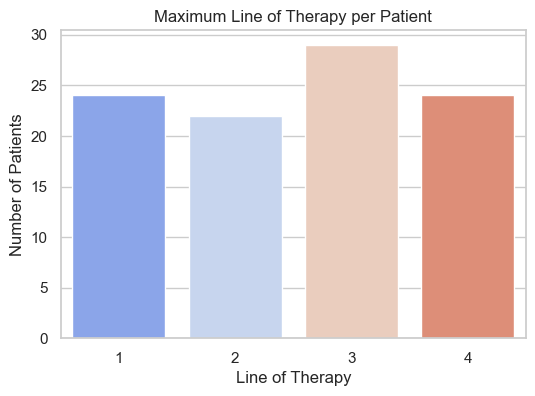

In [25]:
#Lot per patient
lot_counts = df.groupby("Patient_ID")["Line_of_Therapy"].max().value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=lot_counts.index, y=lot_counts.values, palette="coolwarm")
plt.title("Maximum Line of Therapy per Patient")
plt.xlabel("Line of Therapy")
plt.ylabel("Number of Patients")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_8812\194035676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cancer_Type", y="Duration_Days", palette="pastel")


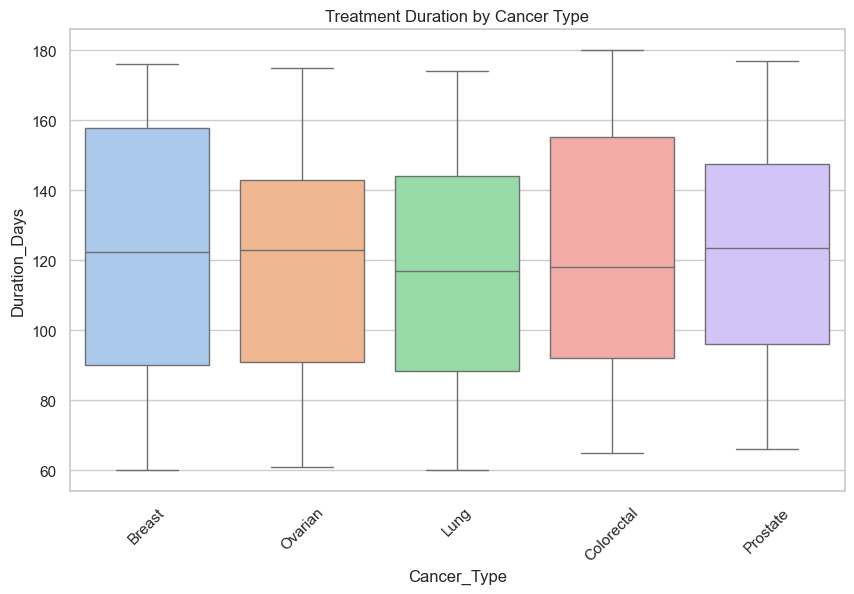

In [26]:
#Treatment duration by cancer type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Cancer_Type", y="Duration_Days", palette="pastel")
plt.title("Treatment Duration by Cancer Type")
plt.xticks(rotation=45)
plt.show()


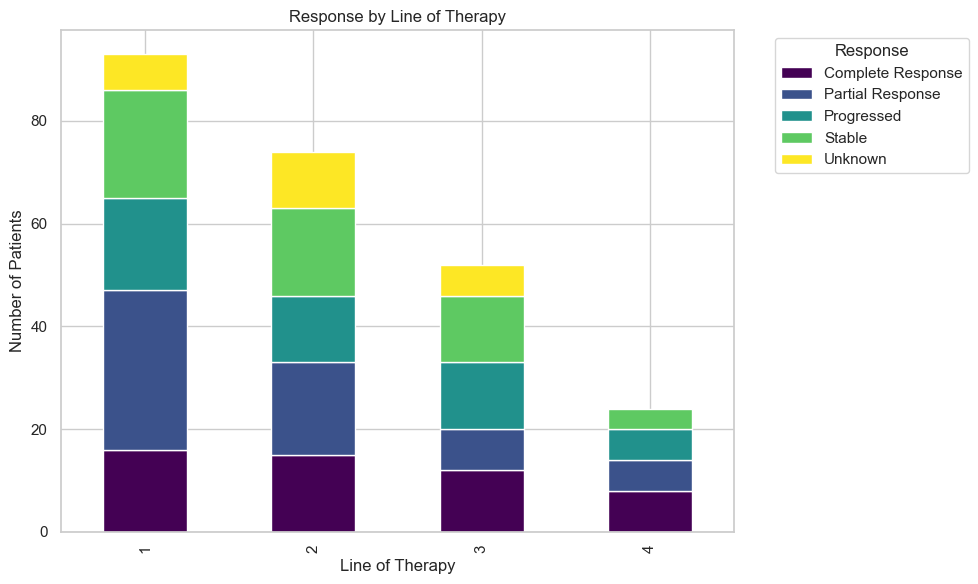

In [27]:
#Response duration across Lot
response_lot = df.groupby(['Line_of_Therapy', 'Response']).size().unstack().fillna(0)
response_lot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Response by Line of Therapy")
plt.xlabel("Line of Therapy")
plt.ylabel("Number of Patients")
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


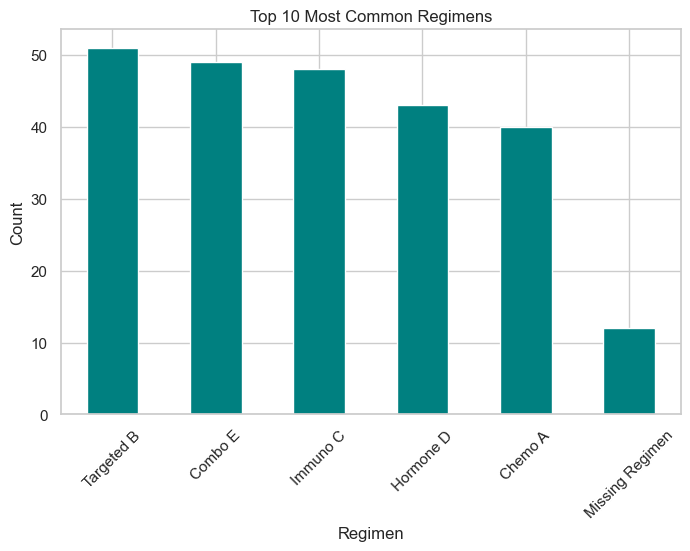

In [28]:
#most common regimens
plt.figure(figsize=(8, 5))
df['Regimen'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Most Common Regimens")
plt.xlabel("Regimen")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Key Insights:**

**Line of Therapy Distribution:**
Most patients received 1–3 lines of therapy, with a notable drop-off beyond 3L, which aligns with real-world treatment attrition patterns in oncology.

**Treatment Response Trends:**
Response rates tended to decline in later lines of therapy, with higher rates of "Progressed" or "Stable" outcomes in 3L+ cases. This supports existing clinical observations that efficacy diminishes over time in advanced disease.

**Regimen Usage:**
A few regimens (e.g., Chemo A, Targeted B) appeared frequently across cancer types, reflecting potential first-line standards or broad applicability across indications.

**Treatment Duration:**
Treatment duration varied by cancer type. For example, ovarian and prostate cancer patients tended to have longer durations, possibly reflecting chronic maintenance therapies.

**Data Quality Challenges Addressed:**
Handled missing values in response and regimen fields
Removed or flagged records with logically invalid dates
Cleaned text inconsistencies (e.g., case mismatches, trailing spaces)
Identified and removed exact duplicate records

**Conclusion:**
This project demonstrates the challenges and opportunities in working with real-world oncology data. By simulating typical data quality issues and applying cleaning, aggregation, and visualization techniques, we can extract meaningful clinical insights that reflect patient journeys and therapy patterns.

Such foundational analytics form the basis for:
Clinical trial feasibility assessments
Health outcomes research
Predictive modeling for personalized treatment strategies

